In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Acropolis 2023'
raceDate = '9/2023'
surface = 'Gravel'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/80243-eko-acropolis-rally-greece-2023/?s='
startat, no_ss=423312, int(15)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [2]:
for ss in range(0,no_ss):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [3]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#69,Rovanperä Kall,RC1,1:32.9,-,57.4,1,Acropolis 2023,9/2023,Gravel,Wrc,1
1,2,#4,Lappi Esapekka,RC1,1:33.2,+0.3 +0.3,57.2 0.20,1,Acropolis 2023,9/2023,Gravel,Wrc,2
2,3,#11,Neuville Thier,RC1,1:33.3,+0.4 +0.1,57.1 0.27,1,Acropolis 2023,9/2023,Gravel,Wrc,3
3,4,#6,Sordo Dani - C,RC1,1:33.4,+0.5 +0.1,57.0 0.34,1,Acropolis 2023,9/2023,Gravel,Wrc,4
4,5,#8,Tänak Ott - Jä,RC1,1:33.6,+0.7 +0.2,56.9 0.47,1,Acropolis 2023,9/2023,Gravel,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,#60,Creighton Will,RC3,30:14.5,+12:13.1 +1:12.7,56.2 25.9,6,Acropolis 2023,9/2023,Gravel,Wrc,62
62,63,#78,Papageorgiou L,RC4,31:01.1,+12:59.7 +46.6,54.8 27.5,6,Acropolis 2023,9/2023,Gravel,Wrc,63
63,64,#82,Kanellopoulos,RC4,31:22.1,+13:20.7 +21.0,54.2 28.3,6,Acropolis 2023,9/2023,Gravel,Wrc,64
64,65,#56,Delaportas Gio,RC3,31:29.2,+13:27.8 +7.1,54.0 28.5,6,Acropolis 2023,9/2023,Gravel,Wrc,65


In [5]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [8]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Rovanperä Kall,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,1,92.9
1,Lappi Esapekka,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,2,93.2
2,Neuville Thier,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,3,93.3
3,Sordo Dani - C,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,4,93.4
4,Tänak Ott - Jä,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,5,93.6
...,...,...,...,...,...,...,...,...,...
61,Creighton Will,RC3,6,Acropolis 2023,9/2023,Gravel,Wrc,62,1814.5
62,Papageorgiou L,RC4,6,Acropolis 2023,9/2023,Gravel,Wrc,63,1861.1
63,Kanellopoulos,RC4,6,Acropolis 2023,9/2023,Gravel,Wrc,64,1882.1
64,Delaportas Gio,RC3,6,Acropolis 2023,9/2023,Gravel,Wrc,65,1889.2


In [9]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race           ss Gr/Cl             
Acropolis 2023 1  RC1           92.9
                  RC2           95.0
                  RC3          101.7
                  RC4          109.7
                  RC5          115.5
               2  RC1          334.4
                  RC2          358.4
                  RC3          386.7
                  RC4          424.9
                  RC5          470.4
               3  RC1          676.8
                  RC2          719.0
                  RC3          769.8
                  RC4          856.5
                  RC5          959.9
               4  RC1          332.1
                  RC2            NaN
                  RC3            NaN
                  RC4            NaN
                  RC5            NaN
               5  RC1          771.7
                  RC2          811.8
                  RC3          872.7
                  RC4          940.5
                  RC5         1079.5
               6  RC1         1081.4
                  RC2         1141.8
                  RC3         1214.5
                  RC4         1327.7
                  RC5         1476.1

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Rovanperä Kall,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,1,92.9,92.9,92.9,0.0,0.0,0.000000,01
1,Lappi Esapekka,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,2,93.2,92.9,92.9,0.3,0.3,0.322928,01
2,Neuville Thier,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,3,93.3,92.9,92.9,0.4,0.4,0.430571,01
3,Sordo Dani - C,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,4,93.4,92.9,92.9,0.5,0.5,0.538213,01
4,Tänak Ott - Jä,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,5,93.6,92.9,92.9,0.7,0.7,0.753498,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Papageorgiou L,RC4,6,Acropolis 2023,9/2023,Gravel,Wrc,63,1861.1,1327.7,1081.4,779.7,533.4,40.174738,06
395,Kanellopoulos,RC4,6,Acropolis 2023,9/2023,Gravel,Wrc,64,1882.1,1327.7,1081.4,800.7,554.4,41.756421,06
396,Kaltsounis Har,RC4,6,Acropolis 2023,9/2023,Gravel,Wrc,66,1927.7,1327.7,1081.4,846.3,600.0,45.190932,06
397,Parellis Junio,RC5,6,Acropolis 2023,9/2023,Gravel,Wrc,55,1476.1,1476.1,1081.4,394.7,0.0,0.000000,06


In [26]:
Group = 'RC1'
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Rovanperä Kall,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,1,92.9,92.9,92.9,0.0,0.0,0.000000,01
1,Lappi Esapekka,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,2,93.2,92.9,92.9,0.3,0.3,0.322928,01
2,Neuville Thier,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,3,93.3,92.9,92.9,0.4,0.4,0.430571,01
3,Sordo Dani - C,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,4,93.4,92.9,92.9,0.5,0.5,0.538213,01
4,Tänak Ott - Jä,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,5,93.6,92.9,92.9,0.7,0.7,0.753498,01
5,Ogier Sébastie,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,6,94.2,92.9,92.9,1.3,1.3,1.399354,01
6,Katsuta Takamo,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,7,94.2,92.9,92.9,1.3,1.3,1.399354,01
7,Loubet Pierre-,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,8,94.6,92.9,92.9,1.7,1.7,1.829925,01
8,Evans Elfyn -,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,12,95.7,92.9,92.9,2.8,2.8,3.013994,01
9,Serderidis Jou,RC1,1,Acropolis 2023,9/2023,Gravel,Wrc,32,103.5,92.9,92.9,10.6,10.6,11.410118,01


In [27]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06
Crew,,,,,,
Evans Elfyn -,2.8,4.2,9.0,5.3,22.6,8.2
Katsuta Takamo,1.3,9.2,11.3,8.5,17.8,14.7
Lappi Esapekka,0.3,6.8,10.4,3.8,16.1,15.8
Loubet Pierre-,1.7,NaN,NaN,NaN,NaN,NaN
Neuville Thier,0.4,0.0,3.1,2.2,5.9,9.5
Ogier Sébastie,1.3,3.4,3.4,0.0,10.9,4.9
Rovanperä Kall,0.0,5.5,0.0,6.0,20.2,14.9
Serderidis Jou,10.6,44.1,103.9,43.4,113.2,190.6
Sordo Dani - C,0.5,6.4,12.3,6.0,17.6,26.9


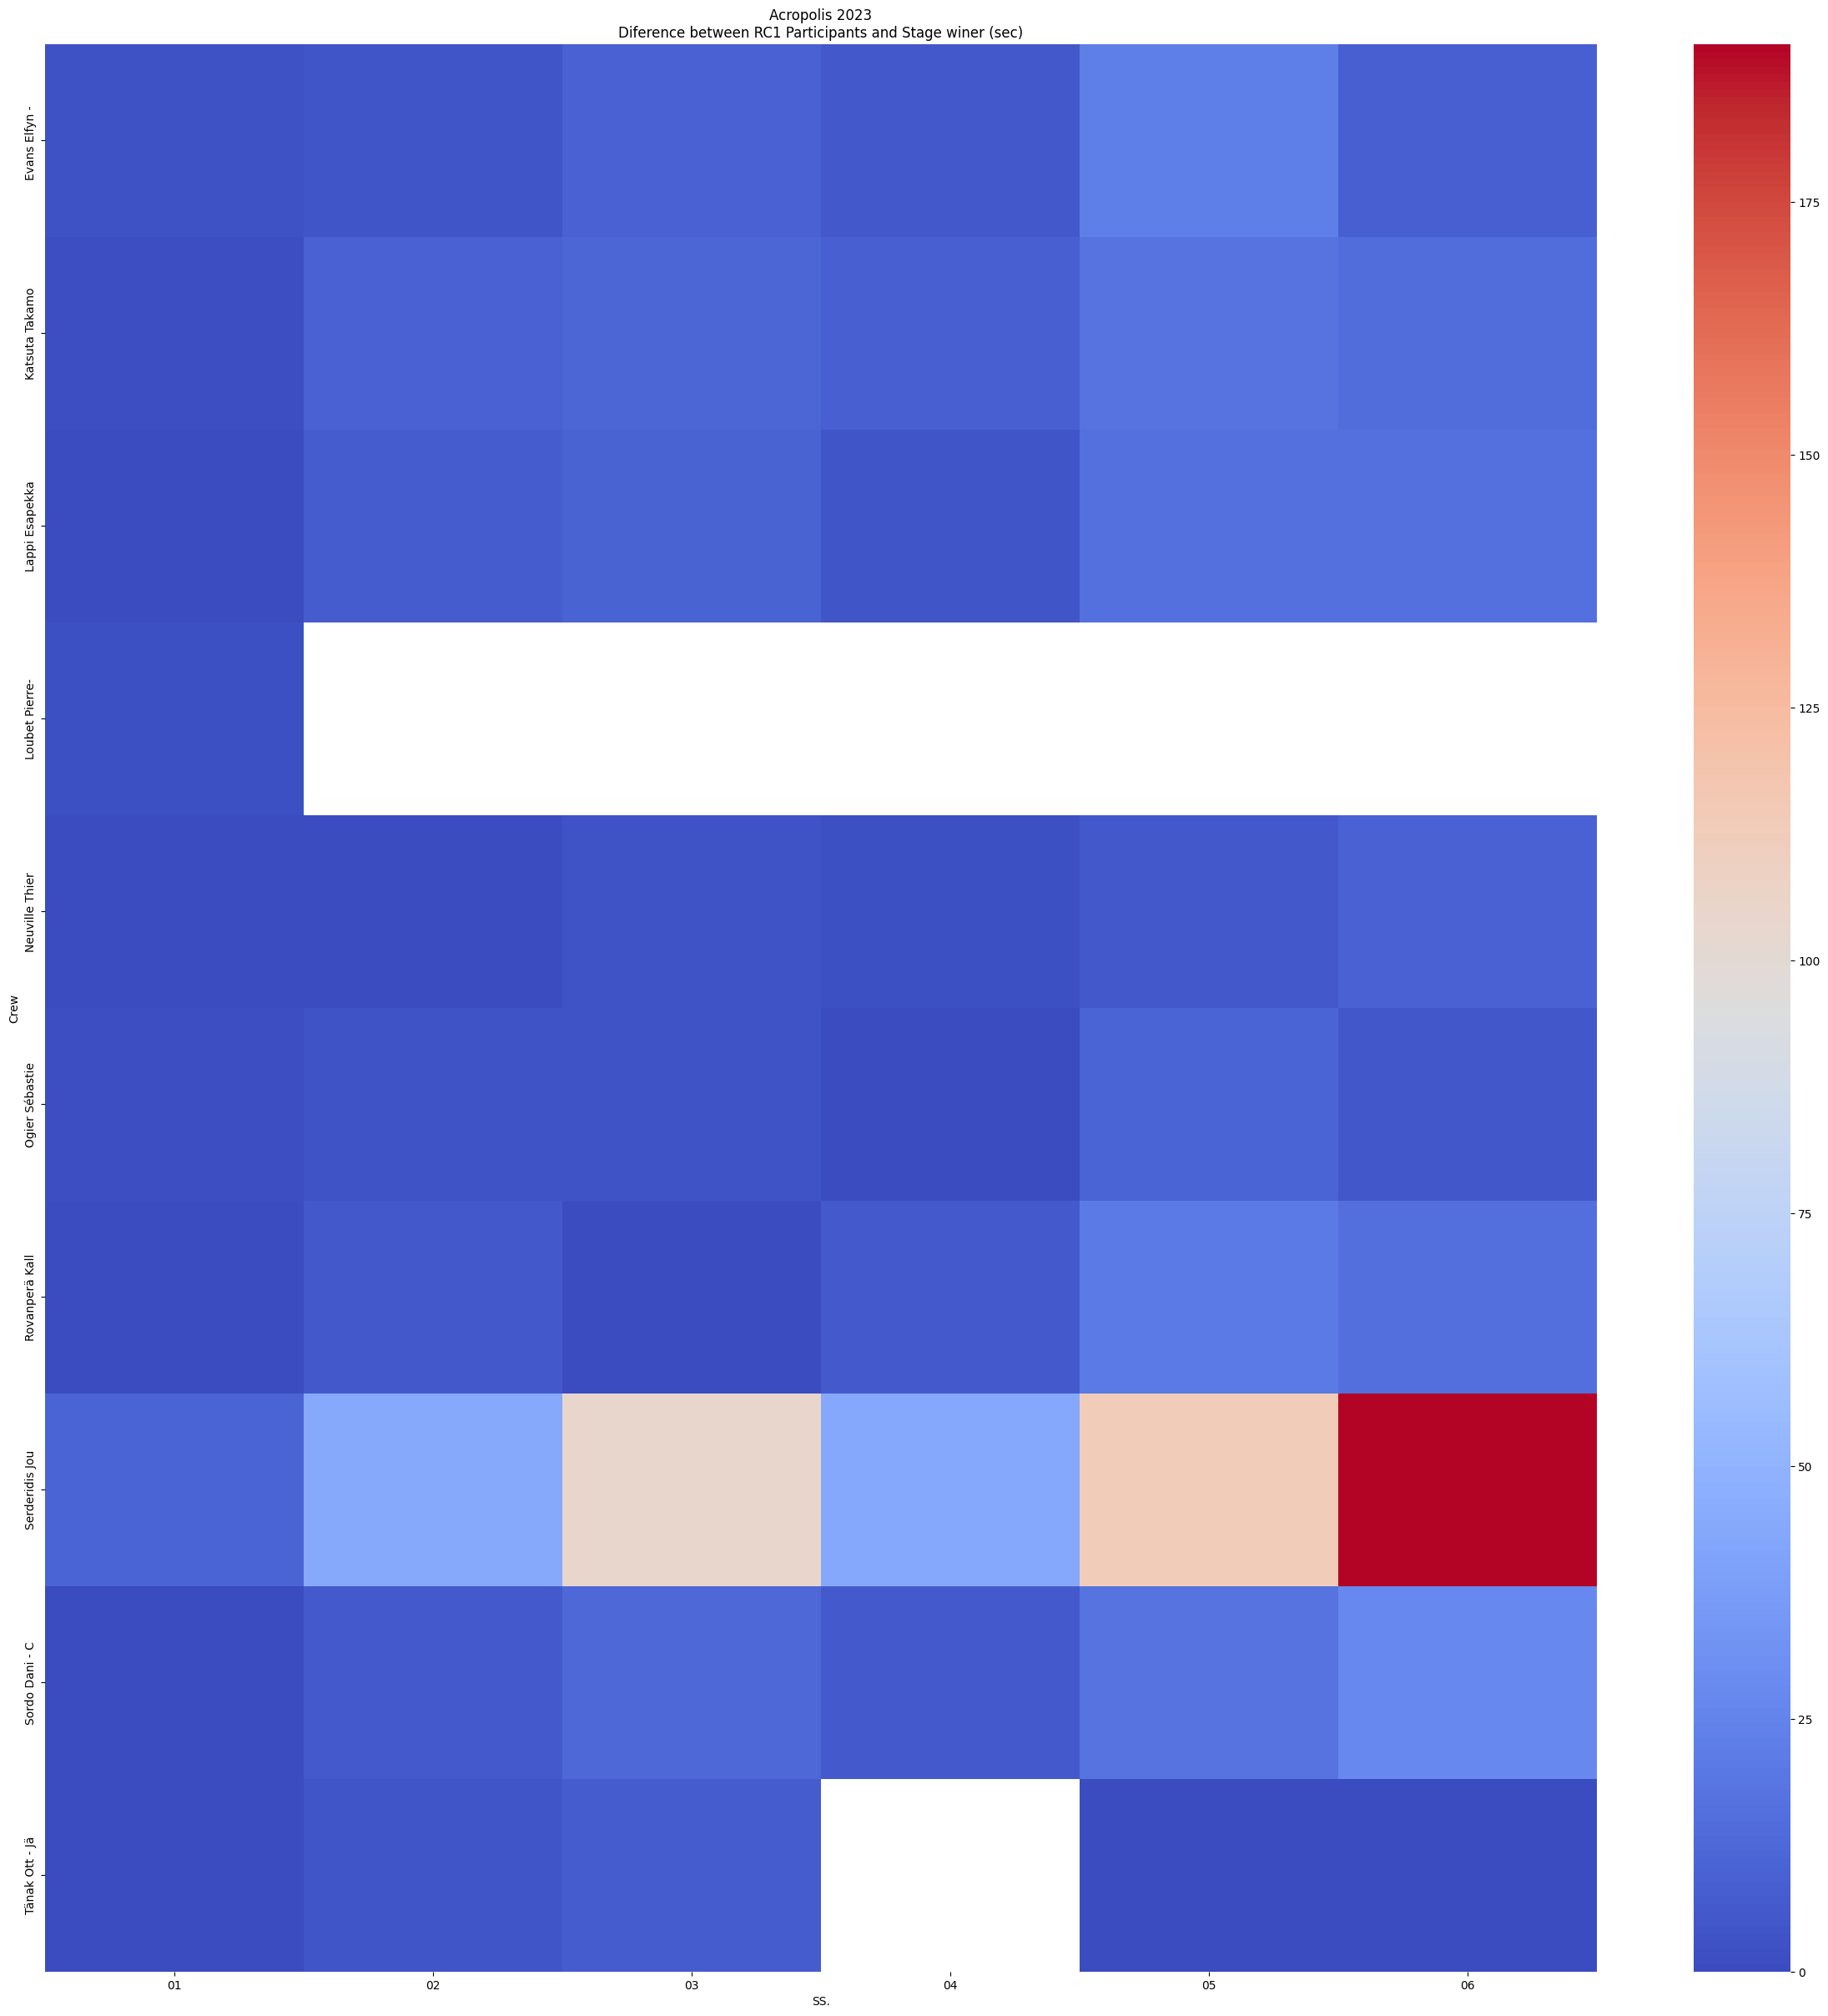

In [28]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

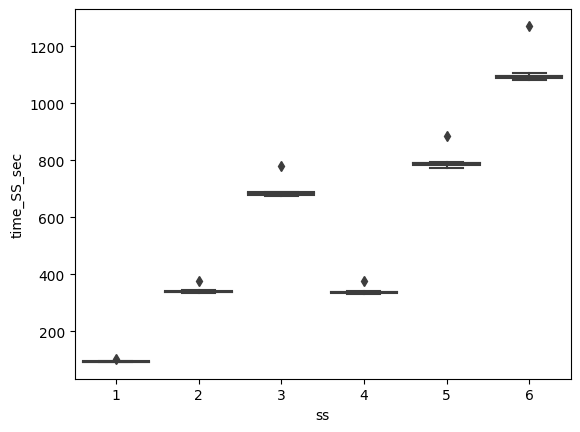

In [29]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + Group + ".png")

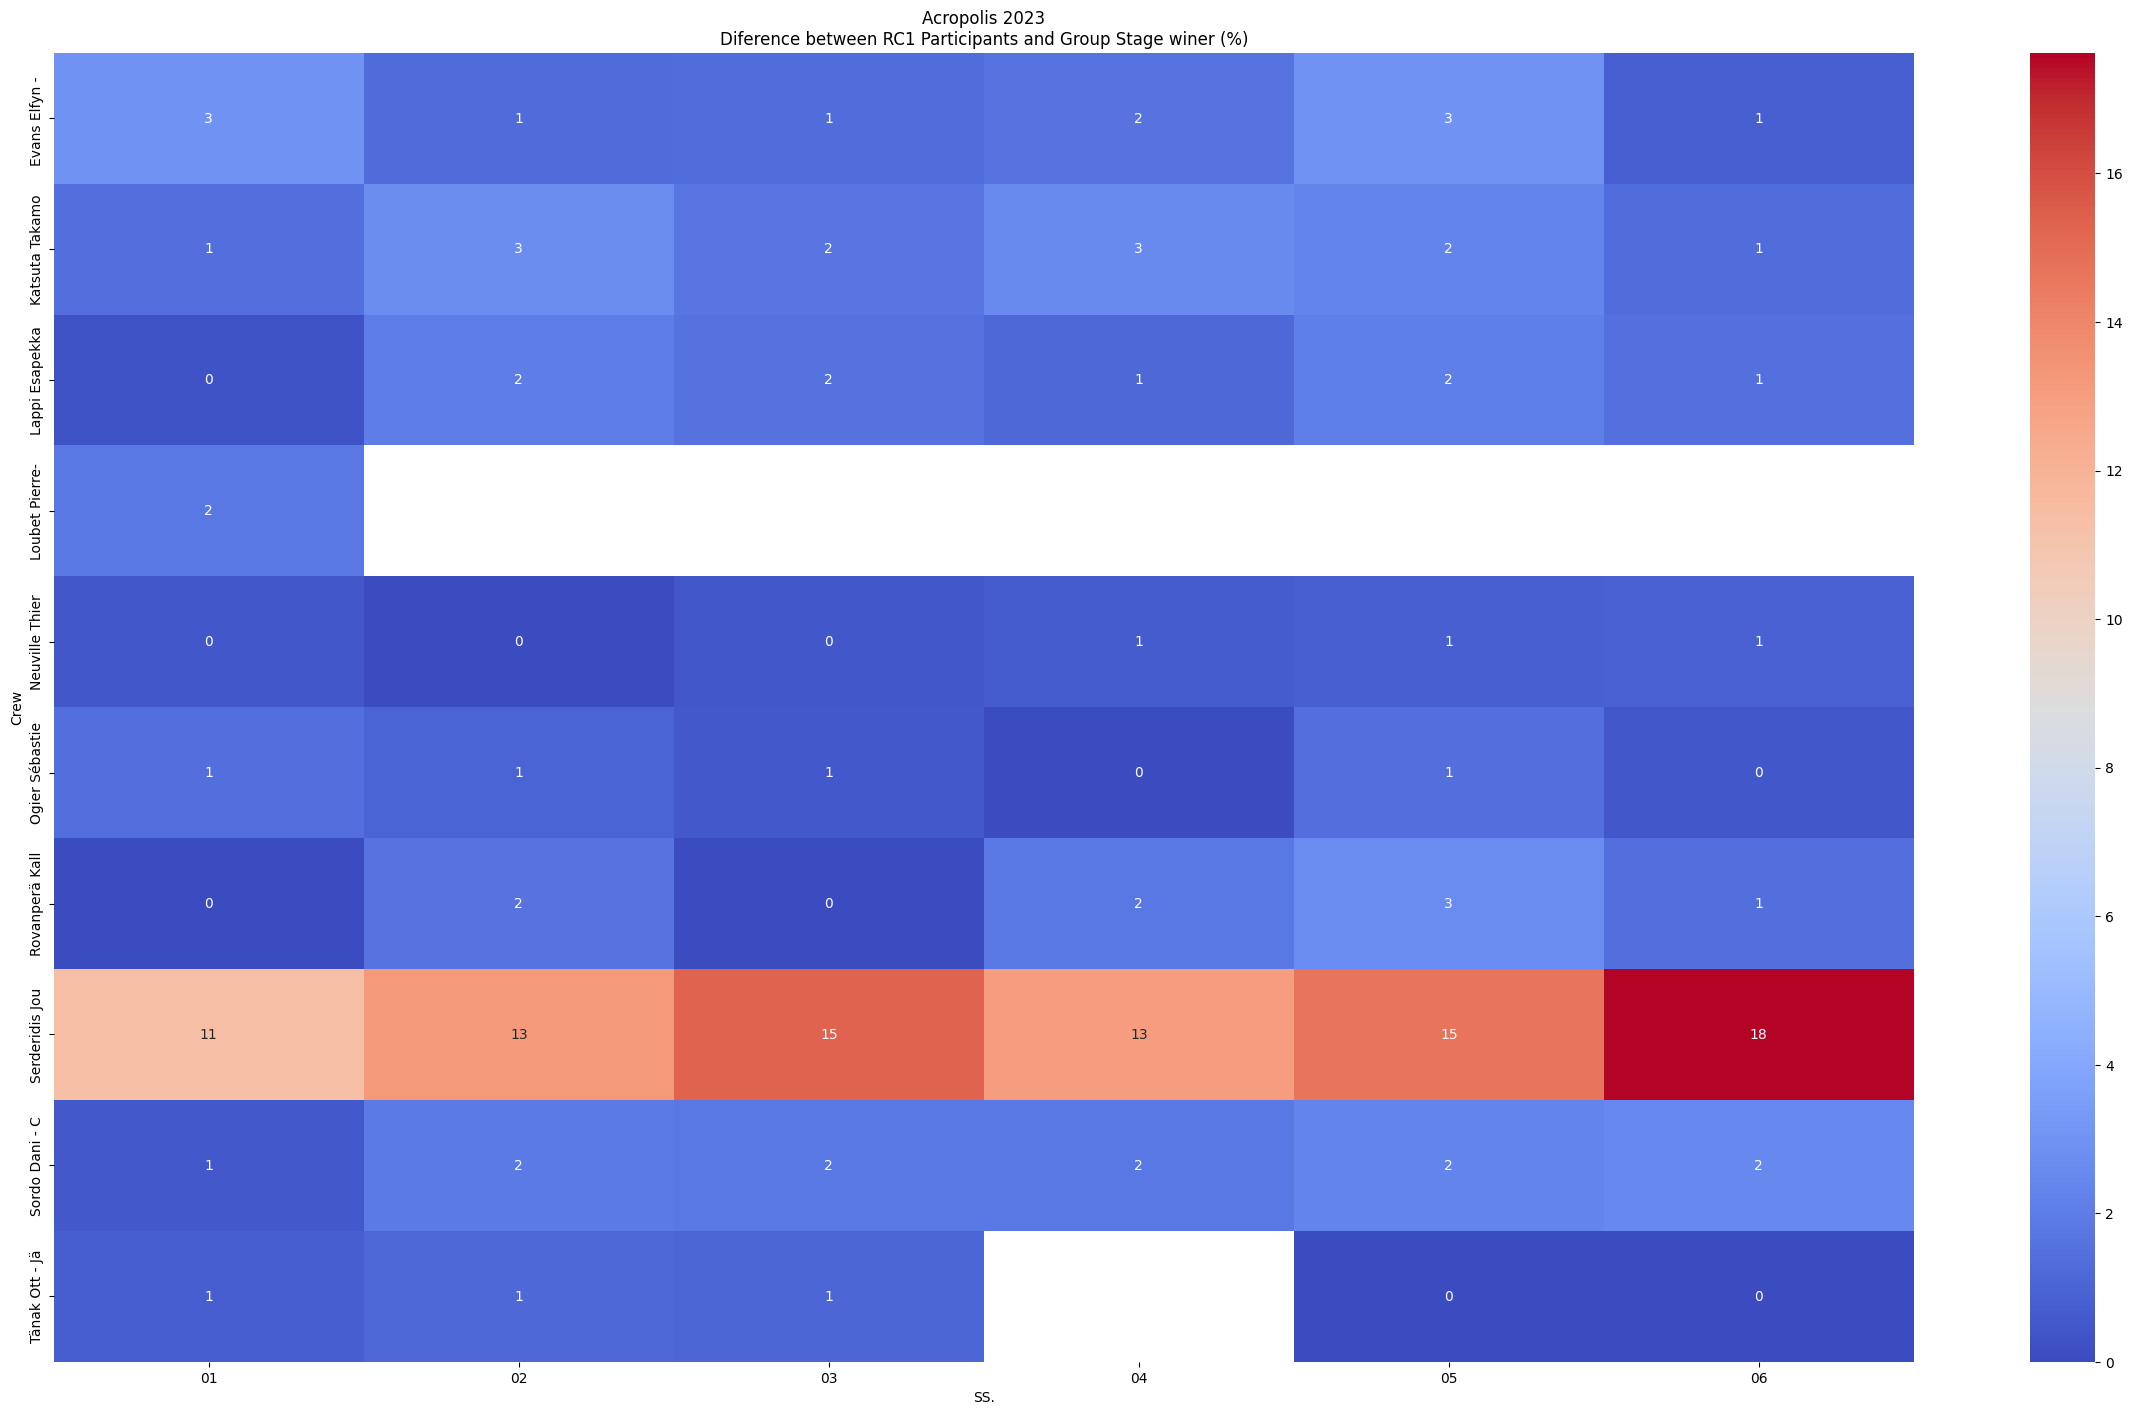

In [30]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".jpg")
plt.show()